# Prediction of Fraud in Credit Card 

In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler 

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

## Carga de datos 

In [2]:
df = pd.read_csv("../data/card_transdata.csv")
df.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0

## Análisis Exploratorio 

In [3]:
# Cuantas filas y columnas tenemos
df.shape

(1000000, 8)

In [4]:
# Cuántos valores nulos tenemos en el dataset
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
# Cuántos valores nulos tenemos en el dataset
df.duplicated().sum()

0

En este caso, podemos ver que no tenemos duplicados ni nulos 🧽

In [6]:
# Exploramos los tipos de los datos que tenemos
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [7]:
df.describe().T

count       mean        std       min  \
distance_from_home              1000000.0  26.628792  65.390784  0.004874   
distance_from_last_transaction  1000000.0   5.036519  25.843093  0.000118   
ratio_to_median_purchase_price  1000000.0   1.824182   2.799589  0.004399   
repeat_retailer                 1000000.0   0.881536   0.323157  0.000000   
used_chip                       1000000.0   0.350399   0.477095  0.000000   
used_pin_number                 1000000.0   0.100608   0.300809  0.000000   
online_order                    1000000.0   0.650552   0.476796  0.000000   
fraud                           1000000.0   0.087403   0.282425  0.000000   

                                     25%       50%        75%           max  
distance_from_home              3.878008  9.967760  25.743985  10632.723672  
distance_from_last_transaction  0.296671  0.998650   3.355748  11851.104565  
ratio_to_median_purchase_price  0.475673  0.997717   2.096370    267.802942  
repeat_retailer                 1.000000  1.000000   1.000000      1.000000  
used_chip                       0.000000  0.000000   1.000000      1.000000  
used_pin_number                 0.000000  0.000000   0.000000      1.000000  
online_order                    0.000000  1.000000   1.000000      1.000000  
fraud                           0.000000  0.000000   0.000000      1.000000

## Visualicemos: 

### - Variable Respuesta 

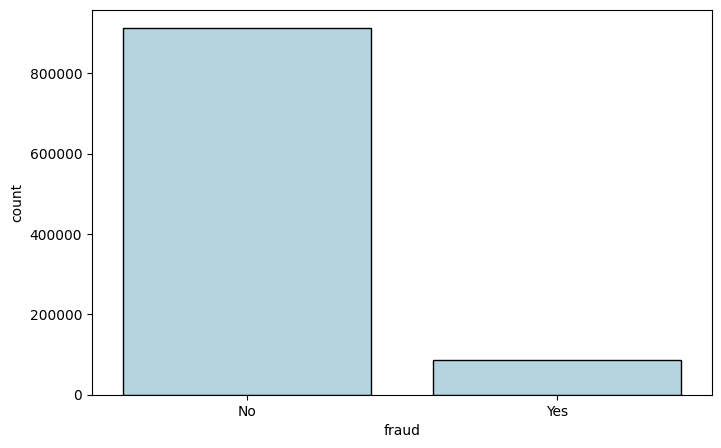

In [8]:
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df, x = "fraud",  color = "lightblue",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [9]:
df["fraud"].value_counts() / df.shape[0]

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

### - Variables Numéricas 

In [10]:
columnas_numeric = df.drop(["repeat_retailer", "used_chip","used_pin_number","online_order","fraud"], axis=1).select_dtypes(include = np.number)
columnas_numeric

distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  
0                             1.945940  
1                             1.294219  
2                             0.427715  
3                             0.362663  
4                             2.222767  
...                                ...  
999995                        1.626798  
999996                        2.778303  
999997                        0.218075  
999998                        0.475822  
999999                        0.386920  

[1000000 rows x 3 columns]

In [11]:
columnas_01 = df.drop(["distance_from_home", "distance_from_last_transaction","ratio_to_median_purchase_price","fraud"], axis=1).select_dtypes(include = np.number)
columnas_01

repeat_retailer  used_chip  used_pin_number  online_order
0                   1.0        1.0              0.0           0.0
1                   1.0        0.0              0.0           0.0
2                   1.0        0.0              0.0           1.0
3                   1.0        1.0              0.0           1.0
4                   1.0        1.0              0.0           1.0
...                 ...        ...              ...           ...
999995              1.0        1.0              0.0           0.0
999996              1.0        1.0              0.0           0.0
999997              1.0        1.0              0.0           1.0
999998              1.0        0.0              0.0           1.0
999999              1.0        1.0              0.0           1.0

[1000000 rows x 4 columns]

In [12]:
columnas_numeric.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price'],
      dtype='object')

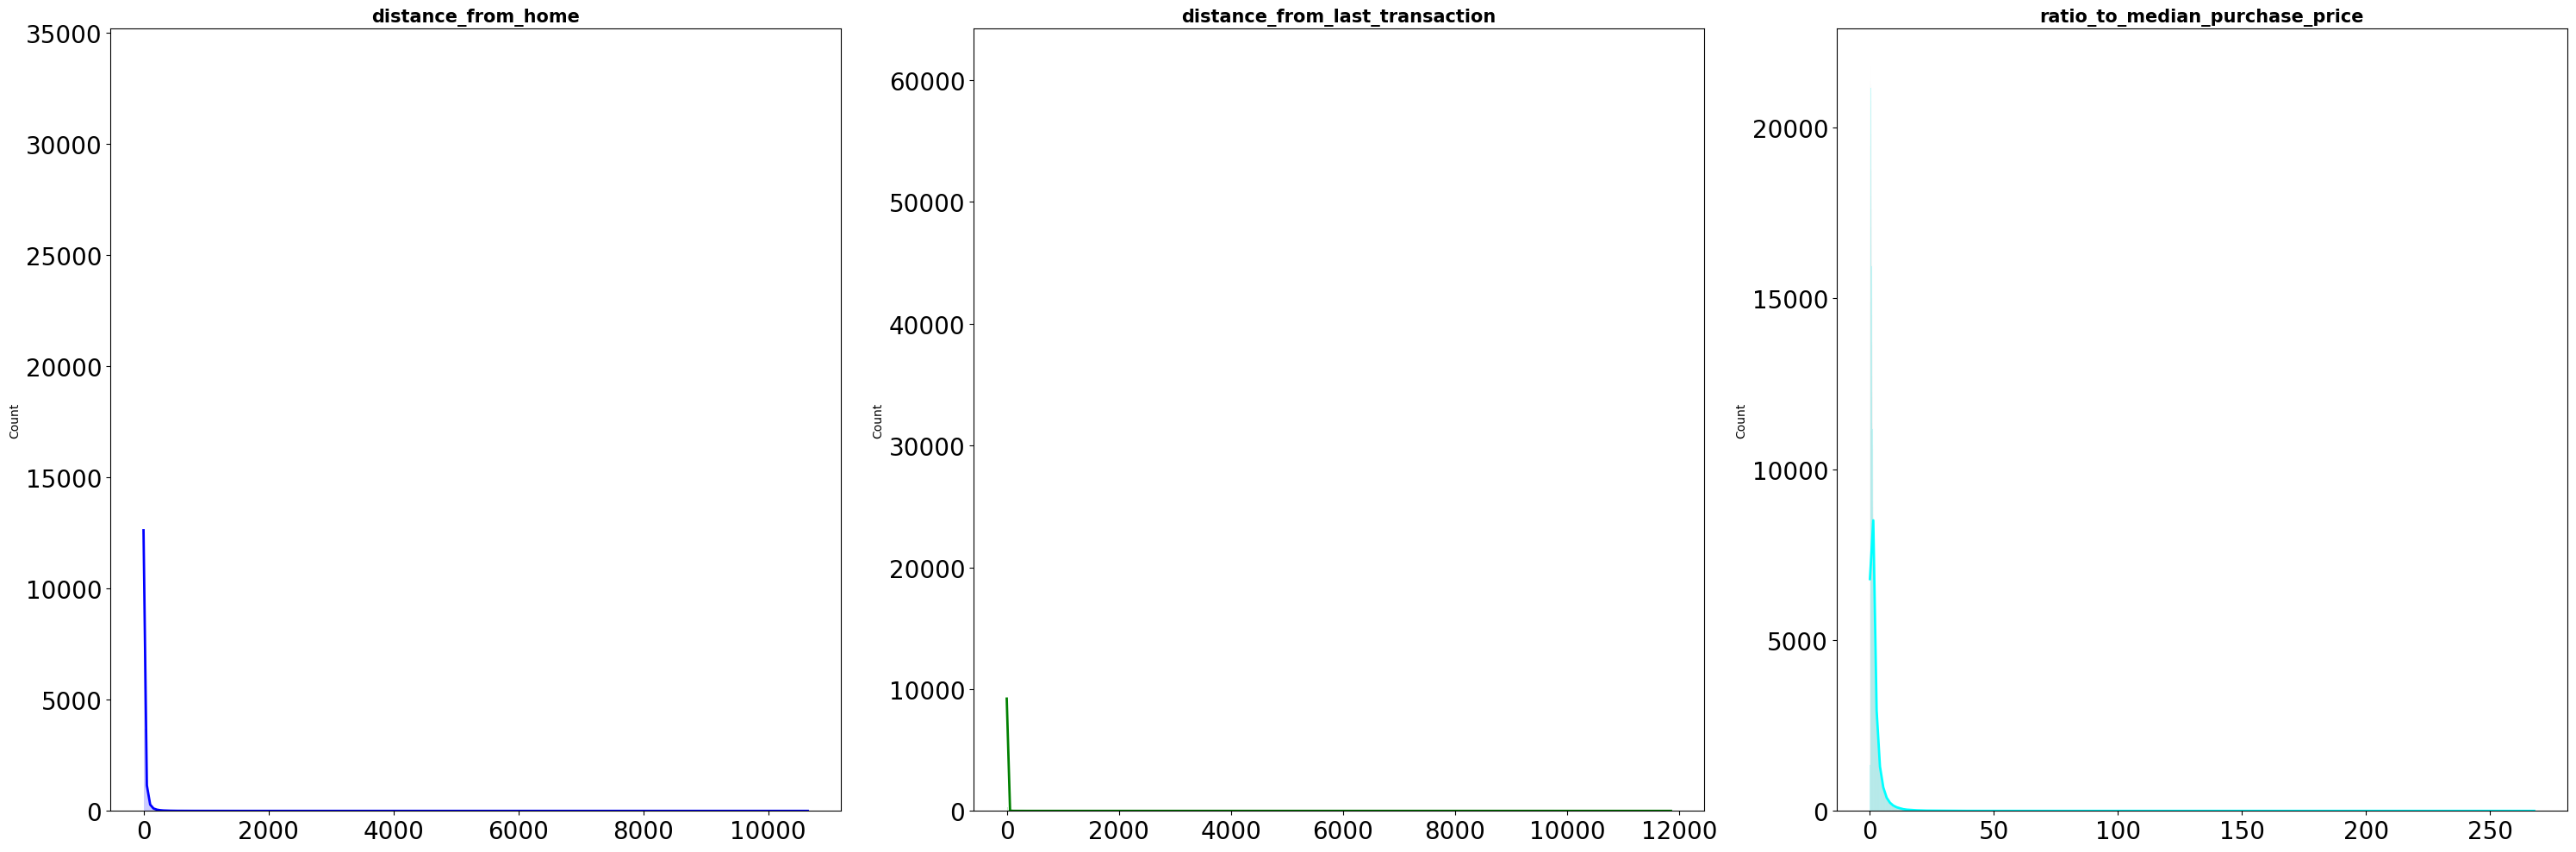

In [13]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "cyan"]

axes = axes.flat

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

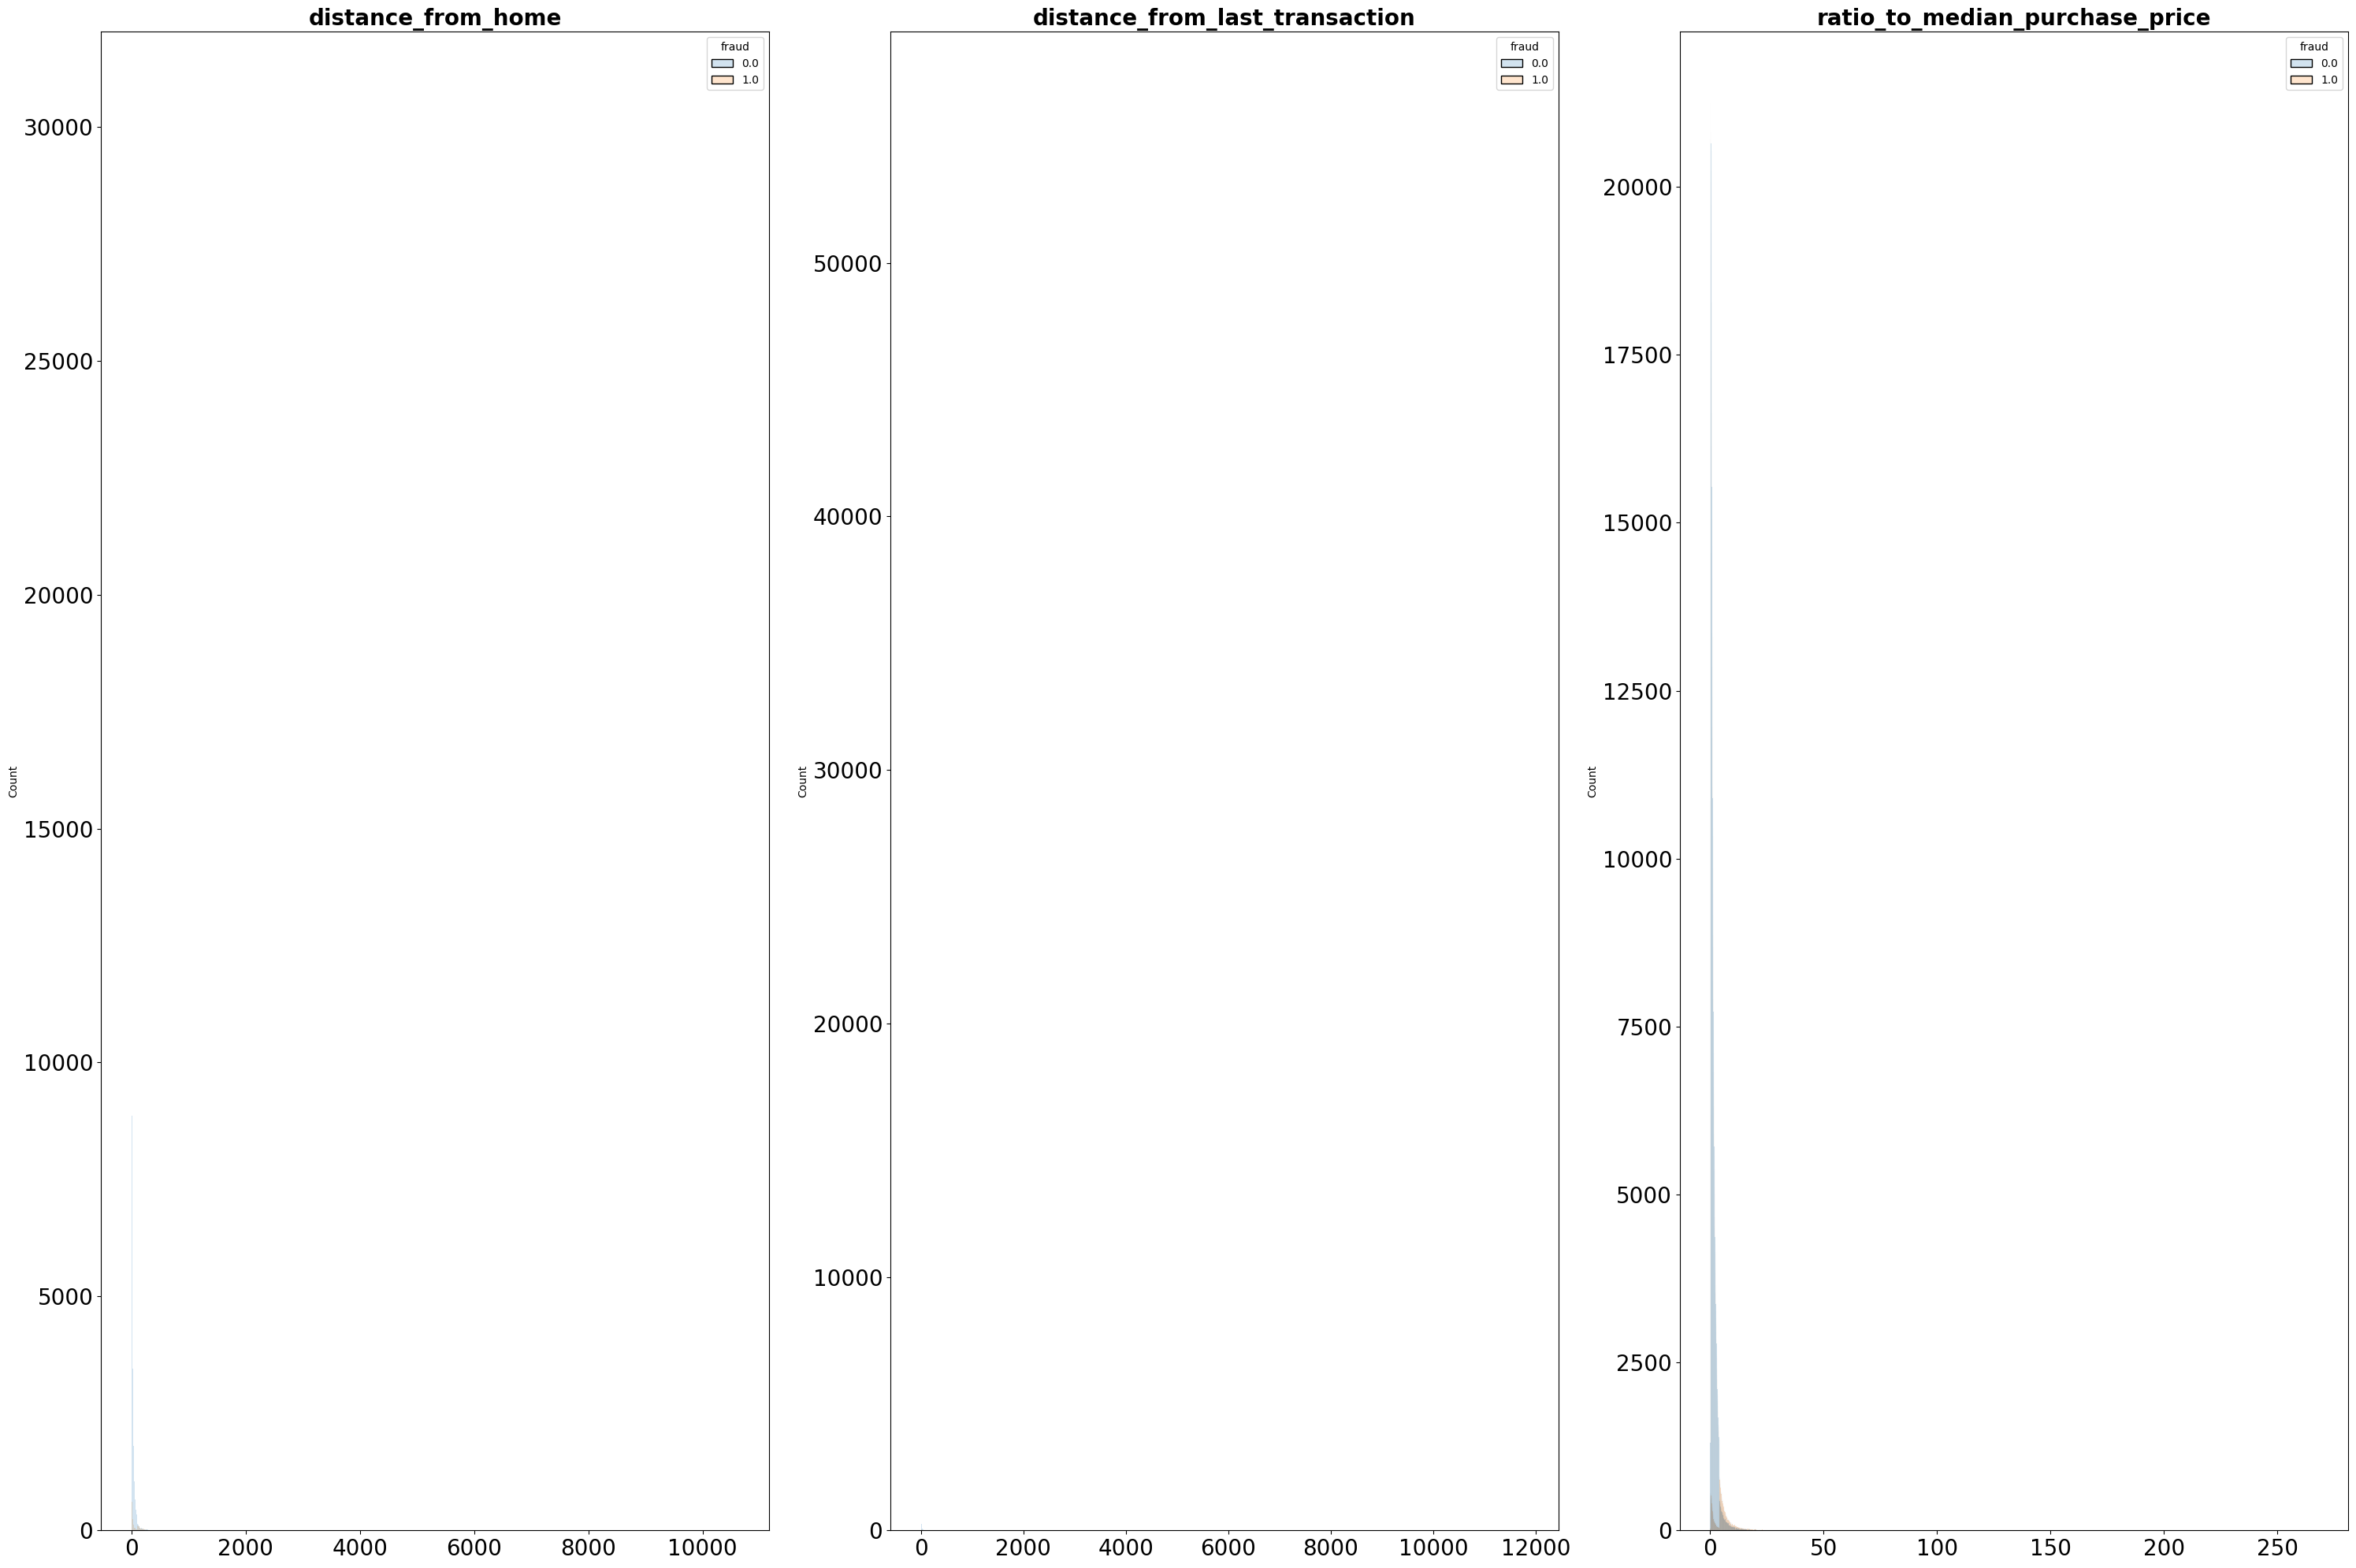

In [14]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 20))

lista_colores = ["blue", "green", "cyan"]

axes = axes.flat

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data = df,
        x = colum,
        hue = "fraud", 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 20, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

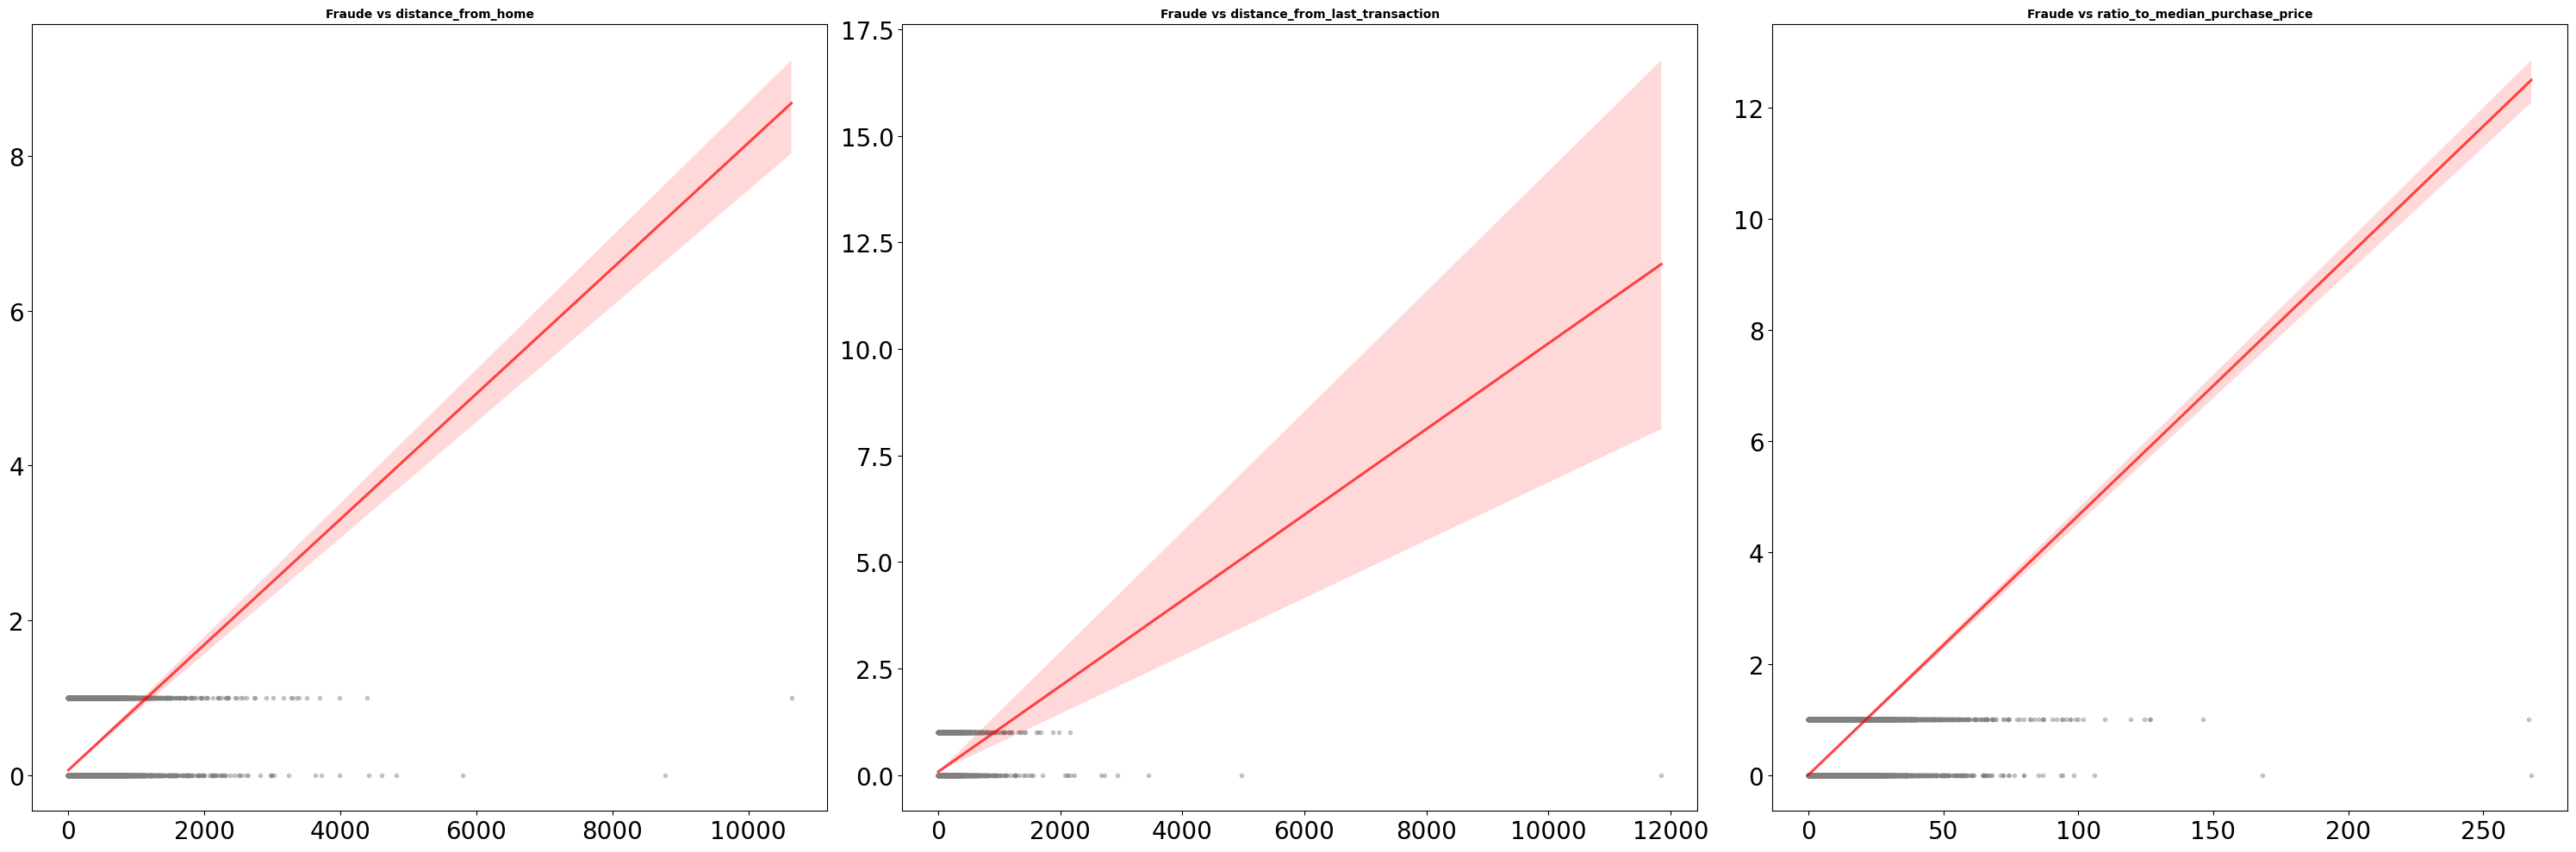

In [15]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "cyan"]

axes = axes.flat

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["fraud"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Fraude vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

###  Heatmap

In [16]:
df_numericas = df.select_dtypes(include = np.number).drop("fraud", axis = 1)
df_numericas.head()

distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  
0              0.0           0.0  
1              0.0           0.0  
2              0.0           1.0  
3              0.0           1.0  
4              0.0           1.0

In [17]:
correlation = df_numericas.corr()
correlation

distance_from_home  \
distance_from_home                        1.000000   
distance_from_last_transaction            0.000193   
ratio_to_median_purchase_price           -0.001374   
repeat_retailer                           0.143124   
used_chip                                -0.000697   
used_pin_number                          -0.001622   
online_order                             -0.001301   

                                distance_from_last_transaction  \
distance_from_home                                    0.000193   
distance_from_last_transaction                        1.000000   
ratio_to_median_purchase_price                        0.001013   
repeat_retailer                                      -0.000928   
used_chip                                             0.002055   
used_pin_number                                      -0.000899   
online_order                                          0.000141   

                                ratio_to_median_purchase_price  \
distance_from_home                                   -0.001374   
distance_from_last_transaction                        0.001013   
ratio_to_median_purchase_price                        1.000000   
repeat_retailer                                       0.001374   
used_chip                                             0.000587   
used_pin_number                                       0.000942   
online_order                                         -0.000330   

                                repeat_retailer  used_chip  used_pin_number  \
distance_from_home                     0.143124  -0.000697        -0.001622   
distance_from_last_transaction        -0.000928   0.002055        -0.000899   
ratio_to_median_purchase_price         0.001374   0.000587         0.000942   
repeat_retailer                        1.000000  -0.001345        -0.000417   
used_chip                             -0.001345   1.000000        -0.001393   
used_pin_number                       -0.000417  -0.001393         1.000000   
online_order                          -0.000532  -0.000219        -0.000291   

                                online_order  
distance_from_home                 -0.001301  
distance_from_last_transaction      0.000141  
ratio_to_median_purchase_price     -0.000330  
repeat_retailer                    -0.000532  
used_chip                          -0.000219  
used_pin_number                    -0.000291  
online_order                        1.000000

In [18]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

**Pruebas Ana**

In [19]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [20]:
df["fraud"].unique()

array([0., 1.])

In [21]:
df_fraude = df[df["fraud"] == 1]
df_no_fraude = df[df["fraud"] == 0]

In [22]:
columnas_numeric_fraude = df_fraude.drop(["repeat_retailer", "used_chip","used_pin_number","online_order","fraud"], axis=1).select_dtypes(include = np.number)
columnas_numeric_no_fraude = df_no_fraude.drop(["repeat_retailer", "used_chip","used_pin_number","online_order","fraud"], axis=1).select_dtypes(include = np.number)


In [23]:
columnas_numeric_fraude.head(1)

distance_from_home  distance_from_last_transaction  \
13            2.131956                       56.372401   

    ratio_to_median_purchase_price  
13                        6.358667

In [24]:
df_group = df.groupby("fraud").agg(["median", "std"]).reset_index()
df_group

fraud distance_from_home             distance_from_last_transaction  \
                    median         std                         median   
0   0.0           9.673847   52.828655                       0.985074   
1   1.0          15.454219  134.391608                       1.157631   

             ratio_to_median_purchase_price           repeat_retailer  \
         std                         median       std          median   
0  22.472359                       0.913950  1.946152             1.0   
1  47.997697                       5.071294  5.564320             1.0   

            used_chip           used_pin_number           online_order  \
        std    median       std          median       std       median   
0  0.322997       0.0  0.479825             0.0  0.312821          1.0   
1  0.324825       0.0  0.436647             0.0  0.055801          1.0   

             
        std  
0  0.484831  
1  0.225391

In [25]:
df_group = df.groupby("fraud").agg(["min", "max"]).reset_index()
df_group

fraud distance_from_home               distance_from_last_transaction  \
                       min           max                            min   
0   0.0           0.004874   8777.136420                       0.000118   
1   1.0           0.025847  10632.723672                       0.000407   

                ratio_to_median_purchase_price             repeat_retailer  \
            max                            min         max             min   
0  11851.104565                       0.004399  267.802942             0.0   
1   2160.499922                       0.011966  266.689692             0.0   

       used_chip      used_pin_number      online_order       
   max       min  max             min  max          min  max  
0  1.0       0.0  1.0             0.0  1.0          0.0  1.0  
1  1.0       0.0  1.0             0.0  1.0          0.0  1.0

In [26]:
df_group = df.groupby("fraud").mean().reset_index()
df_group

fraud  distance_from_home  distance_from_last_transaction  \
0    0.0           22.832976                        4.301391   
1    1.0           66.261876                       12.712185   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.423642         0.881672   0.359402   
1                        6.006323         0.880119   0.256399   

   used_pin_number  online_order  
0         0.109944      0.622225  
1         0.003123      0.946318

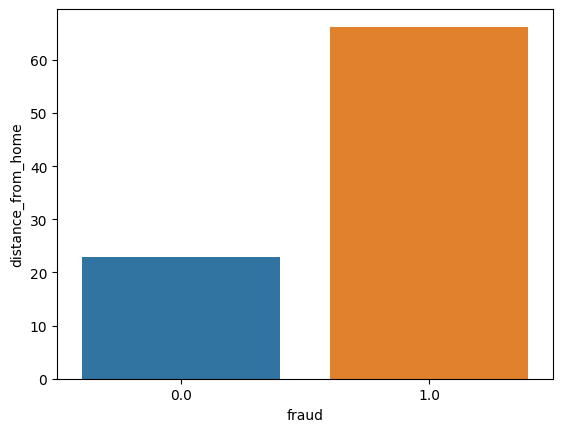

In [27]:
sns.barplot(x = "fraud", y = "distance_from_home", data = df_group);

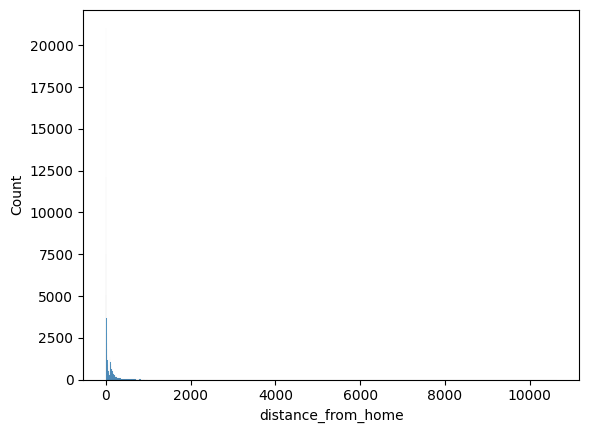

In [28]:
sns.color_palette("hls", 8)
sns.histplot(x = "distance_from_home", data = df_fraude);

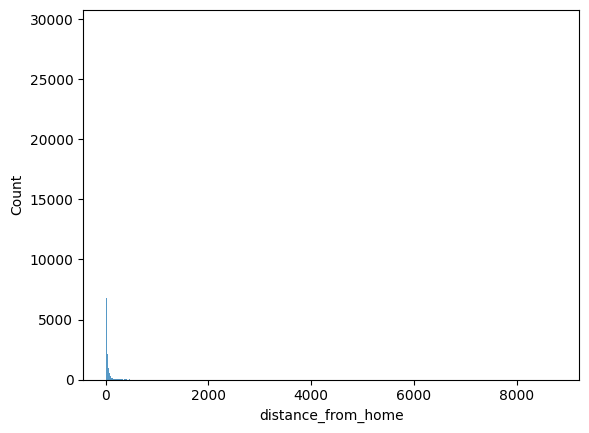

In [29]:
sns.color_palette("hls", 8)
sns.histplot(x = "distance_from_home", data = df_no_fraude);

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(columnas_numeric_fraude.columns)):
    sns.boxplot(x=columnas_numeric_fraude.columns[i], data=columnas_numeric_fraude, ax=ax[i])
plt.show()

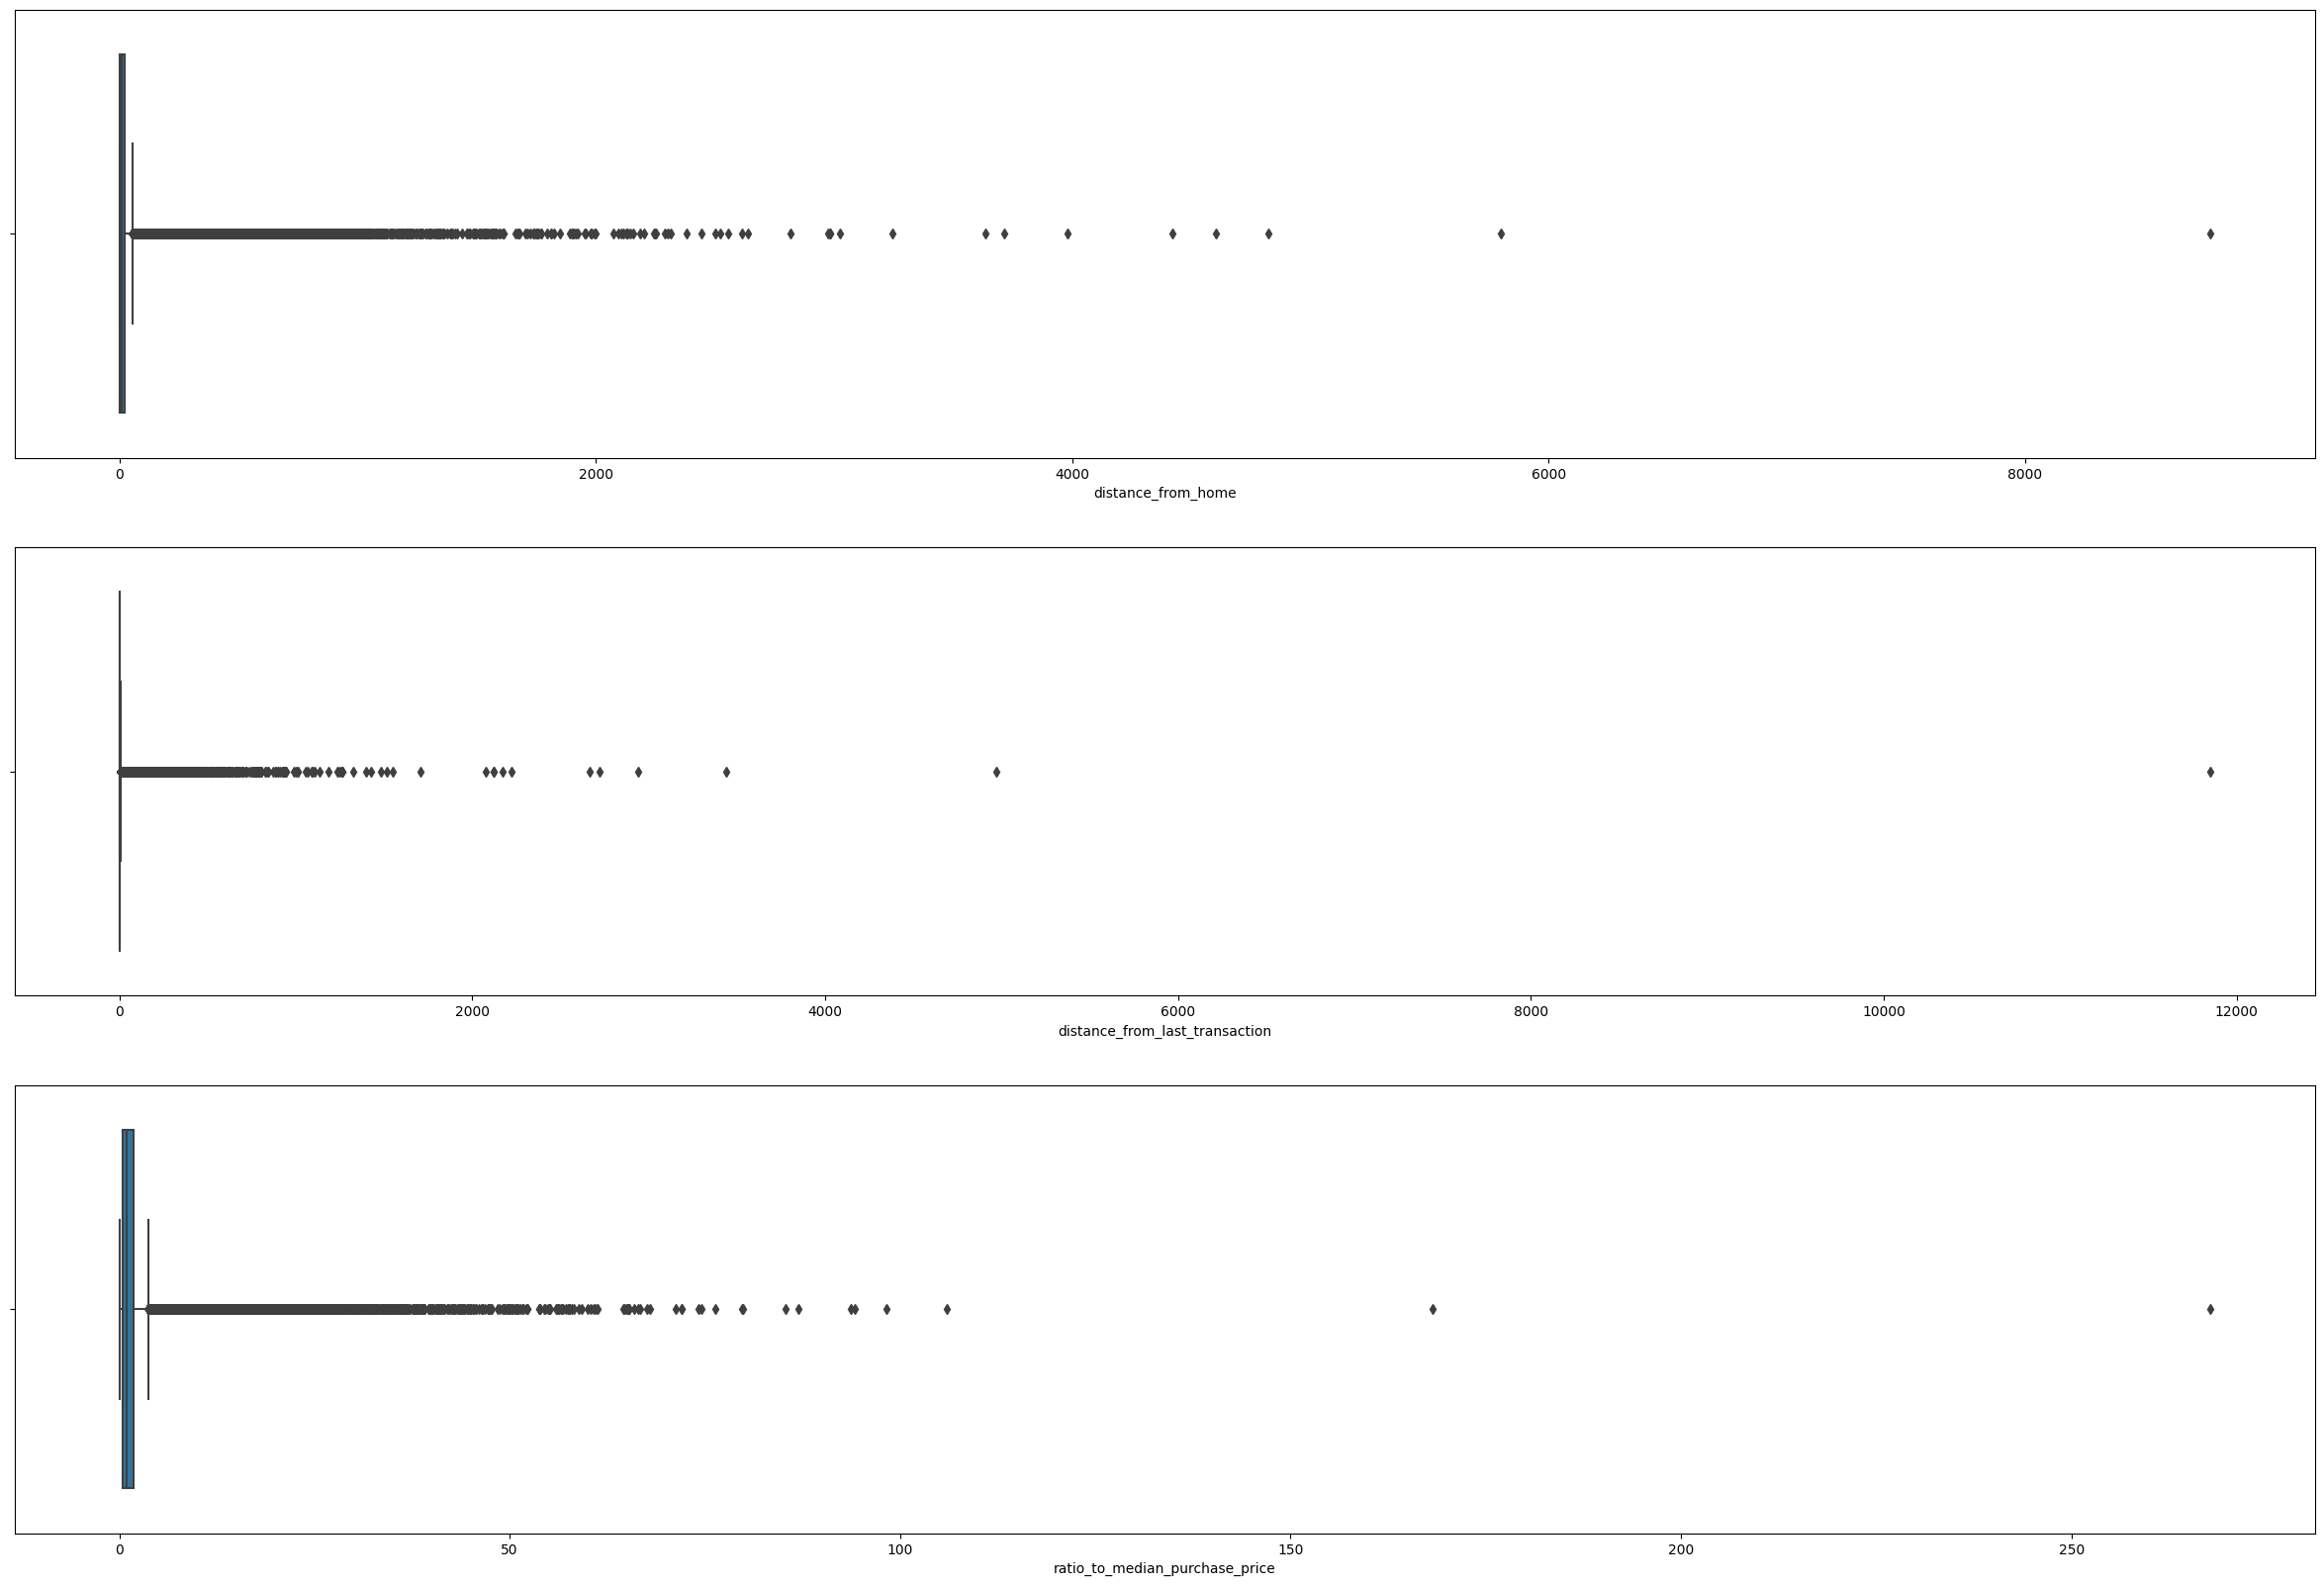

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(columnas_numeric_no_fraude.columns)):
    sns.boxplot(x=columnas_numeric_no_fraude.columns[i], data=columnas_numeric_no_fraude, ax=ax[i])
plt.show()

## Outliers

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(30,20))

for i in range(len(columnas_numeric.columns)):
    sns.boxplot(x=columnas_numeric.columns[i], data=columnas_numeric, ax=ax[i])
plt.show()